# DAB 103: Analytical Tools & Decision Making - Project 1

## Exploratory Data Analysis of Credit Card Payment Default

### Group# 1
### Team Members:

* Ambily Treesa Varghese
* Srilakshmi Gummadidala
* Jibina Francis
* Satya Akhil Govvala
* Dileep Sathyan

## Import the libraries and read the dataframe

In [1]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read the dataframe

from google.colab import drive
drive.mount('/content/drive')

df_raw = pd.read_excel("drive/MyDrive/Colab-Notebooks/default_of_credit_card_clients.xls", header =1)
df_raw

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


### Set ID as index field

In [6]:
df_raw = df_raw.set_index("ID")
df_raw.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
# Making sure the type of the dataframe

type(df_raw)

pandas.core.frame.DataFrame

In [8]:
# Check the shape of the dataframe

df_raw.shape

(30000, 24)

In [9]:
# Display the last 5 records in the dataframe

df_raw.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [10]:
# Check the column names in the dataframe

df_raw.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Renaming the column names appropriately

In [11]:
col_names= {'LIMIT_BAL': 'CREDIT_LIMIT',
            'SEX': 'GENDER',
            'MARRIAGE': 'MARITAL_STATUS',
            'PAY_0' : 'REPAY_STATUS_SEP',
            'PAY_2' : 'REPAY_STATUS_AUG',
            'PAY_3' : 'REPAY_STATUS_JUL',
            'PAY_4' : 'REPAY_STATUS_JUN',
            'PAY_5' : 'REPAY_STATUS_MAY',
            'PAY_6' : 'REPAY_STATUS_APR',
            'BILL_AMT1' : 'BILL_STMT_AMT_SEP',
            'BILL_AMT2' : 'BILL_STMT_AMT_AUG',
            'BILL_AMT3' : 'BILL_STMT_AMT_JUL',
            'BILL_AMT4' : 'BILL_STMT_AMT_JUN',
            'BILL_AMT5' : 'BILL_STMT_AMT_MAY',
            'BILL_AMT6' : 'BILL_STMT_AMT_APR',
            'PAY_AMT1': 'PAY_AMT_SEP',
            'PAY_AMT2': 'PAY_AMT_AUG', 
            'PAY_AMT3': 'PAY_AMT_JUL', 
            'PAY_AMT4': 'PAY_AMT_JUN', 
            'PAY_AMT5': 'PAY_AMT_MAY', 
            'PAY_AMT6': 'PAY_AMT_APR',
            'default payment next month': 'IS_DEFAULT'}

df_main = df_raw.rename(columns=col_names)
df_main.head()

,CREDIT_LIMIT,GENDER,EDUCATION,MARITAL_STATUS,AGE,REPAY_STATUS_SEP,REPAY_STATUS_AUG,REPAY_STATUS_JUL,REPAY_STATUS_JUN,REPAY_STATUS_MAY,...,BILL_STMT_AMT_JUN,BILL_STMT_AMT_MAY,BILL_STMT_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IS_DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
# View a certain record in the dataframe

df_main.iloc[10,]

CREDIT_LIMIT         200000
GENDER                    2
EDUCATION                 3
MARITAL_STATUS            2
AGE                      34
REPAY_STATUS_SEP          0
REPAY_STATUS_AUG          0
REPAY_STATUS_JUL          2
REPAY_STATUS_JUN          0
REPAY_STATUS_MAY          0
REPAY_STATUS_APR         -1
BILL_STMT_AMT_SEP     11073
BILL_STMT_AMT_AUG      9787
BILL_STMT_AMT_JUL      5535
BILL_STMT_AMT_JUN      2513
BILL_STMT_AMT_MAY      1828
BILL_STMT_AMT_APR      3731
PAY_AMT_SEP            2306
PAY_AMT_AUG              12
PAY_AMT_JUL              50
PAY_AMT_JUN             300
PAY_AMT_MAY            3738
PAY_AMT_APR              66
IS_DEFAULT                0
Name: 11, dtype: int64

In [13]:
df_main.loc[11,'AGE']

34

In [14]:
# Check the columns and datatypes in the dataframne

df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   CREDIT_LIMIT       30000 non-null  int64
 1   GENDER             30000 non-null  int64
 2   EDUCATION          30000 non-null  int64
 3   MARITAL_STATUS     30000 non-null  int64
 4   AGE                30000 non-null  int64
 5   REPAY_STATUS_SEP   30000 non-null  int64
 6   REPAY_STATUS_AUG   30000 non-null  int64
 7   REPAY_STATUS_JUL   30000 non-null  int64
 8   REPAY_STATUS_JUN   30000 non-null  int64
 9   REPAY_STATUS_MAY   30000 non-null  int64
 10  REPAY_STATUS_APR   30000 non-null  int64
 11  BILL_STMT_AMT_SEP  30000 non-null  int64
 12  BILL_STMT_AMT_AUG  30000 non-null  int64
 13  BILL_STMT_AMT_JUL  30000 non-null  int64
 14  BILL_STMT_AMT_JUN  30000 non-null  int64
 15  BILL_STMT_AMT_MAY  30000 non-null  int64
 16  BILL_STMT_AMT_APR  30000 non-null  int64
 17  PAY_AMT_SEP 

## Convert the columns to right data types

In [15]:
cat_cols = ['GENDER', 'EDUCATION', 'MARITAL_STATUS', 'IS_DEFAULT']

df_main[cat_cols] = df_main[cat_cols].astype('category')
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CREDIT_LIMIT       30000 non-null  int64   
 1   GENDER             30000 non-null  category
 2   EDUCATION          30000 non-null  category
 3   MARITAL_STATUS     30000 non-null  category
 4   AGE                30000 non-null  int64   
 5   REPAY_STATUS_SEP   30000 non-null  int64   
 6   REPAY_STATUS_AUG   30000 non-null  int64   
 7   REPAY_STATUS_JUL   30000 non-null  int64   
 8   REPAY_STATUS_JUN   30000 non-null  int64   
 9   REPAY_STATUS_MAY   30000 non-null  int64   
 10  REPAY_STATUS_APR   30000 non-null  int64   
 11  BILL_STMT_AMT_SEP  30000 non-null  int64   
 12  BILL_STMT_AMT_AUG  30000 non-null  int64   
 13  BILL_STMT_AMT_JUL  30000 non-null  int64   
 14  BILL_STMT_AMT_JUN  30000 non-null  int64   
 15  BILL_STMT_AMT_MAY  30000 non-null  int64   
 16  BILL

### Check for any NULL values in the dataframe

In [16]:
df_main.isnull().sum()

CREDIT_LIMIT         0
GENDER               0
EDUCATION            0
MARITAL_STATUS       0
AGE                  0
REPAY_STATUS_SEP     0
REPAY_STATUS_AUG     0
REPAY_STATUS_JUL     0
REPAY_STATUS_JUN     0
REPAY_STATUS_MAY     0
REPAY_STATUS_APR     0
BILL_STMT_AMT_SEP    0
BILL_STMT_AMT_AUG    0
BILL_STMT_AMT_JUL    0
BILL_STMT_AMT_JUN    0
BILL_STMT_AMT_MAY    0
BILL_STMT_AMT_APR    0
PAY_AMT_SEP          0
PAY_AMT_AUG          0
PAY_AMT_JUL          0
PAY_AMT_JUN          0
PAY_AMT_MAY          0
PAY_AMT_APR          0
IS_DEFAULT           0
dtype: int64

In [17]:
df_main.describe()

,CREDIT_LIMIT,AGE,REPAY_STATUS_SEP,REPAY_STATUS_AUG,REPAY_STATUS_JUL,REPAY_STATUS_JUN,REPAY_STATUS_MAY,REPAY_STATUS_APR,BILL_STMT_AMT_SEP,BILL_STMT_AMT_AUG,BILL_STMT_AMT_JUL,BILL_STMT_AMT_JUN,BILL_STMT_AMT_MAY,BILL_STMT_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


### Column-wise data exploration

#### Gender column

In [18]:
# Check the values in GENDER column

df_main.GENDER.value_counts()

2    18112
1    11888
Name: GENDER, dtype: int64

In [19]:
# Decode the protos in GENDER field to the appropriate names

# Create a function that converts the code to values
def decode_gender(x):
    if x == 1:
        return 'Male'
    else:
        return 'Female'

# Apply the above function to the GENDER column
df_main.GENDER = df_main.GENDER.apply(decode_gender)
df_main.head()

,CREDIT_LIMIT,GENDER,EDUCATION,MARITAL_STATUS,AGE,REPAY_STATUS_SEP,REPAY_STATUS_AUG,REPAY_STATUS_JUL,REPAY_STATUS_JUN,REPAY_STATUS_MAY,...,BILL_STMT_AMT_JUN,BILL_STMT_AMT_MAY,BILL_STMT_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IS_DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,Female,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,Female,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,Female,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,Female,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,Male,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [20]:
# Check the counts of different values in the GENDER 

df_main.GENDER.value_counts()

Female    18112
Male      11888
Name: GENDER, dtype: int64

In [21]:
# Check the percentage of different values in the GENDER 

df_main.GENDER.value_counts(normalize=True)

Female    0.603733
Male      0.396267
Name: GENDER, dtype: float64

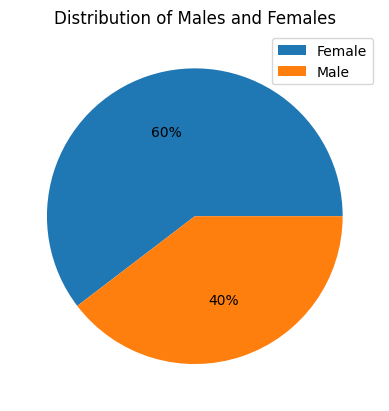

In [22]:
# Plot a pie chart of the GENDER column distribution

plt.pie(df_main.GENDER.value_counts(normalize=True), autopct='%.0f%%')
plt.title('Distribution of Males and Females')
plt.legend(df_main.GENDER.unique())
plt.show()

#### EDUCATION column

In [23]:
# Check the values in the EDUCATION column

df_main.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [24]:
# Decode the protos in EDUCATION field to the appropriate names

edu_dict = {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others',
            5: 'Unknown5', 6: 'Unknown6', 0: 'Unknown0'}

df_main.EDUCATION = df_main.EDUCATION.map(lambda x: edu_dict[x])
df_main.head()

,CREDIT_LIMIT,GENDER,EDUCATION,MARITAL_STATUS,AGE,REPAY_STATUS_SEP,REPAY_STATUS_AUG,REPAY_STATUS_JUL,REPAY_STATUS_JUN,REPAY_STATUS_MAY,...,BILL_STMT_AMT_JUN,BILL_STMT_AMT_MAY,BILL_STMT_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IS_DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,Female,University,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,Female,University,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,Female,University,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,Female,University,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,Male,University,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [25]:
# Verify the updated the values in the EDUCATION column

df_main.EDUCATION.value_counts()

University         14030
Graduate School    10585
High School         4917
Unknown5             280
Others               123
Unknown6              51
Unknown0              14
Name: EDUCATION, dtype: int64

In [26]:
# Check the percentage of different values in the EDUCATION 

df_main.EDUCATION.value_counts(normalize=True)

University         0.467667
Graduate School    0.352833
High School        0.163900
Unknown5           0.009333
Others             0.004100
Unknown6           0.001700
Unknown0           0.000467
Name: EDUCATION, dtype: float64

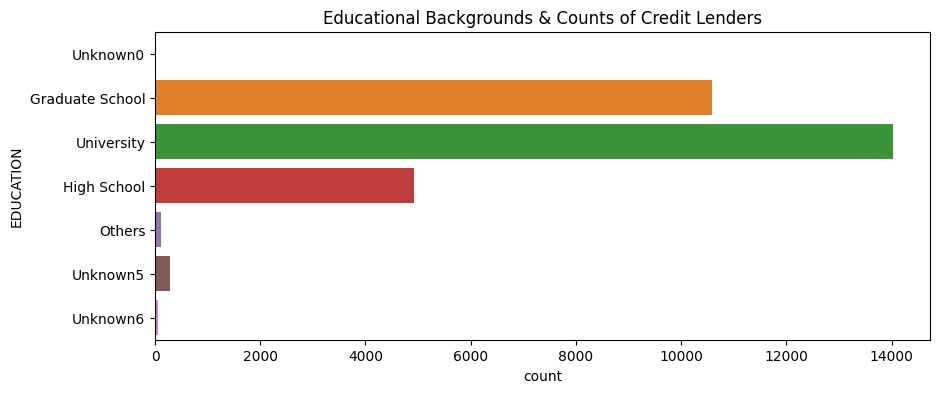

In [27]:
# Create a horizontal barplot of Educational Qualifications credit lenders

fig, ax = plt.subplots(figsize=(10, 4))
sns.countplot(y='EDUCATION', data=df_main, ax=ax)
plt.title('Educational Backgrounds & Counts of Credit Lenders')
plt.show()

#### MARITAL_STATUS column

In [28]:
# Check the values in the MARITAL_STATUS column

df_main.MARITAL_STATUS.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARITAL_STATUS, dtype: int64

In [29]:
# Decode the protos in MARITAL_STATUS field to the appropriate names

# Create a function that converts the code to values
def decode_marriage(x):
    if x == 1:
        return 'Married'
    elif x == 2:
        return 'Single'
    elif x == 3:
        return 'Others'
    else:
        return 'Unknown0'

# Apply the above function to the GENDER column
df_main.MARITAL_STATUS = df_main.MARITAL_STATUS.apply(decode_marriage)
df_main.head()

,CREDIT_LIMIT,GENDER,EDUCATION,MARITAL_STATUS,AGE,REPAY_STATUS_SEP,REPAY_STATUS_AUG,REPAY_STATUS_JUL,REPAY_STATUS_JUN,REPAY_STATUS_MAY,...,BILL_STMT_AMT_JUN,BILL_STMT_AMT_MAY,BILL_STMT_AMT_APR,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IS_DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,Female,University,Married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,Female,University,Single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,Female,University,Single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,Female,University,Married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,Male,University,Married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [30]:
# Verify the updated the values in the MARITAL_STATUS column

df_main.MARITAL_STATUS.value_counts()

Single      15964
Married     13659
Others        323
Unknown0       54
Name: MARITAL_STATUS, dtype: int64

In [31]:
mar_stat_dist = df_main.MARITAL_STATUS.value_counts(normalize=True).reset_index()
mar_stat_dist.rename(columns={'index': 'status', 'MARITAL_STATUS': 'percentage'}, inplace=True)
# mar_stat_dist.insert(-1, 'concat_col', (str(mar_stat_dist.status) + str(mar_stat_dist.percentage * 100) + "%"))
mar_stat_dist.status = mar_stat_dist.status.astype('str')

mar_stat_dist.status + str(mar_stat_dist.percentage)

0    Single0    0.532133\n1    0.455300\n2    0.010...
1    Married0    0.532133\n1    0.455300\n2    0.01...
2    Others0    0.532133\n1    0.455300\n2    0.010...
3    Unknown00    0.532133\n1    0.455300\n2    0.0...
Name: status, dtype: object

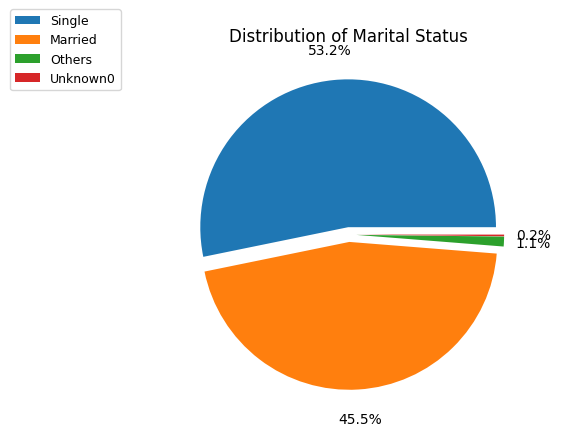

In [32]:
# Create a horizontal barplot of Educational Qualifications credit lenders

pie = plt.pie(df_main.MARITAL_STATUS.value_counts(normalize=True), 
              explode=[0.05]*4, autopct='%.01f%%', pctdistance=1.2)
plt.title('Distribution of Marital Status')
plt.legend(df_main.MARITAL_STATUS.value_counts(normalize=True).keys(), 
           loc='center right', bbox_to_anchor=(-0.1, 1.), fontsize=9)
plt.show()

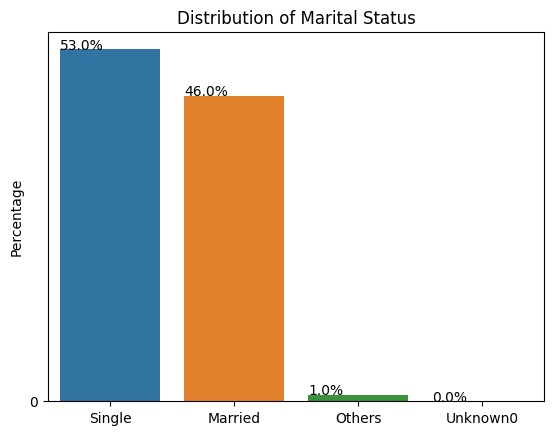

In [34]:
data = df_main.MARITAL_STATUS.value_counts(normalize=True).reset_index()


g = sns.barplot(x=data.index, y=data.MARITAL_STATUS.round(2))

for p in g.patches:
    txt = str(p.get_height() *100) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.text(txt_x,txt_y,txt)

plt.title('Distribution of Marital Status')
g.set_xticklabels(['Single', 'Married', 'Others', 'Unknown0'])
g.set_yticks(np.arange(.6))
plt.ylabel('Percentage')
plt.show()

In [35]:
data.reset_index()

,level_0,index,MARITAL_STATUS
0,0,Single,0.532133
1,1,Married,0.455300
2,2,Others,0.010767
3,3,Unknown0,0.001800


In [36]:
data

,index,MARITAL_STATUS
0,Single,0.532133
1,Married,0.455300
2,Others,0.010767
3,Unknown0,0.001800


In [37]:
data['index']

0      Single
1     Married
2      Others
3    Unknown0
Name: index, dtype: category
Categories (4, object): ['Unknown0', 'Married', 'Single', 'Others']

#### CREDIT_LIMIT column

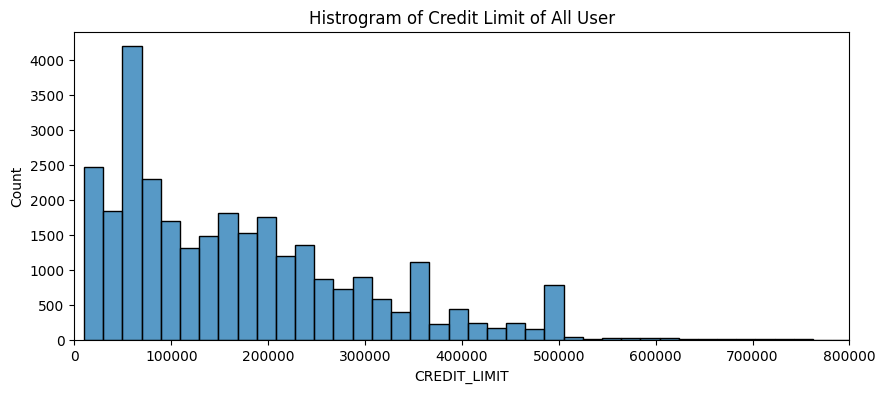

In [38]:
# Histogram of the Credit Limits

fig, ax = plt.subplots(figsize=(10, 4))
sns.histplot(data=df_main, x="CREDIT_LIMIT", bins=50)
ax.set_xlim(0,800000)
plt.title('Histrogram of Credit Limit of All User')
plt.show()

In [39]:
# Check the Minimum and Maximum Credit Limits offered by the Bank

min_crdt = df_main.CREDIT_LIMIT.min()
max_crdt = df_main.CREDIT_LIMIT.max()

print(f'Minimum Credit Limit: {str(min_crdt)} \nMaximum Credit Limit: {str(max_crdt)}')

Minimum Credit Limit: 10000 
Maximum Credit Limit: 1000000


In [40]:
# Describe the Credit Limit column

df_main.CREDIT_LIMIT.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: CREDIT_LIMIT, dtype: float64

#### AGE column

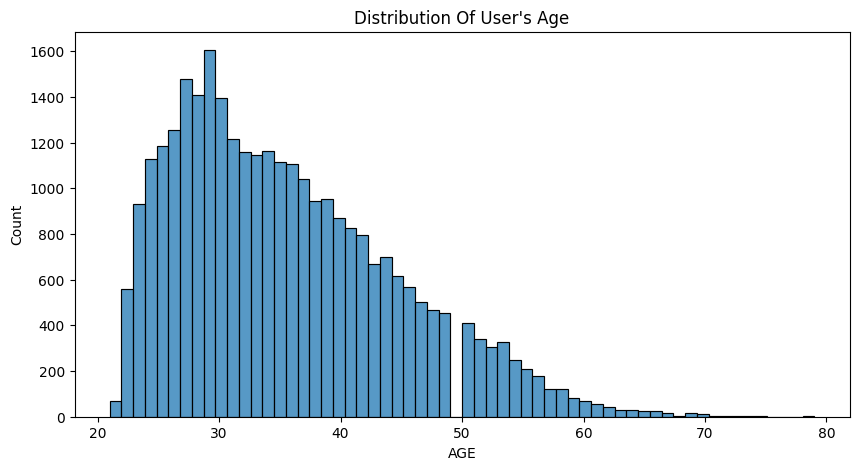

In [41]:
# Histogram of the distribution of AGE of the credit lenders

fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df_main, x="AGE", bins=60)
plt.title("Distribution Of User's Age")
plt.show()

#### IS_DEFAULT column

In [42]:
# Check how many users have defaulted payments in the dataframe

df_main.IS_DEFAULT.value_counts(ascending=True)

1     6636
0    23364
Name: IS_DEFAULT, dtype: int64

In [43]:
# Check how many percentage users have defaulted payments in the dataframe

df_main.IS_DEFAULT.value_counts(normalize=True, ascending=True)

1    0.2212
0    0.7788
Name: IS_DEFAULT, dtype: float64

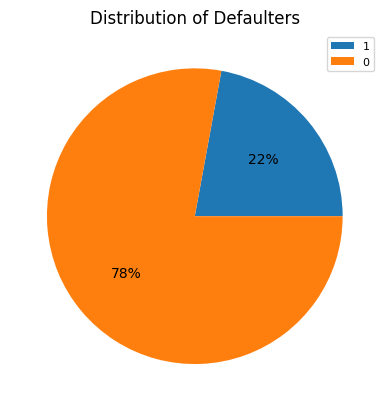

In [44]:
# Create a horizontal barplot of Educational Qualifications credit lenders

plt.pie(df_main.IS_DEFAULT.value_counts(normalize=True, ascending=True), autopct='%.0f%%')
plt.title('Distribution of Defaulters')
plt.legend(df_main.IS_DEFAULT.unique(), fontsize=8)
plt.show()

#### Bill Statement Fields

In [45]:
bill_sums = df_main[['BILL_STMT_AMT_SEP', 'BILL_STMT_AMT_AUG', 'BILL_STMT_AMT_JUL', 
                     'BILL_STMT_AMT_JUN', 'BILL_STMT_AMT_MAY', 'BILL_STMT_AMT_APR']].sum(axis=0)
bill_sums

BILL_STMT_AMT_SEP    1536699927
BILL_STMT_AMT_AUG    1475372255
BILL_STMT_AMT_JUL    1410394644
BILL_STMT_AMT_JUN    1297888469
BILL_STMT_AMT_MAY    1209342029
BILL_STMT_AMT_APR    1166152812
dtype: int64

In [46]:
bill_means = df_main[['BILL_STMT_AMT_SEP', 'BILL_STMT_AMT_AUG', 'BILL_STMT_AMT_JUL', 
                     'BILL_STMT_AMT_JUN', 'BILL_STMT_AMT_MAY', 'BILL_STMT_AMT_APR']].mean(axis=0)
bill_means

BILL_STMT_AMT_SEP    51223.330900
BILL_STMT_AMT_AUG    49179.075167
BILL_STMT_AMT_JUL    47013.154800
BILL_STMT_AMT_JUN    43262.948967
BILL_STMT_AMT_MAY    40311.400967
BILL_STMT_AMT_APR    38871.760400
dtype: float64

### Average Bill Statement Amounts Over the Months

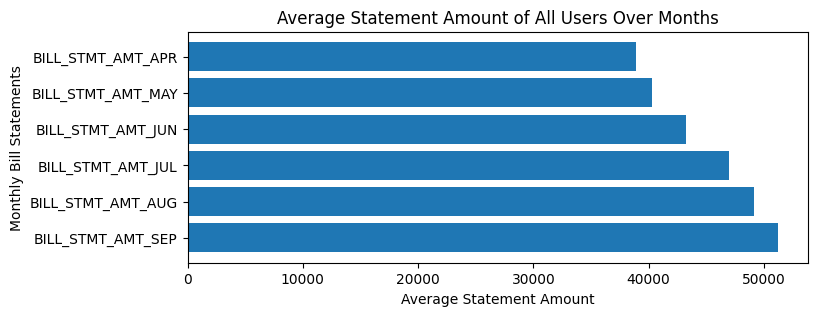

In [47]:
plt.figure(figsize=(8,3))
plt.barh(y= bill_means.keys(), width=bill_means)
plt.title('Average Statement Amount of All Users Over Months')
plt.xlabel('Average Statement Amount')
plt.ylabel('Monthly Bill Statements')
plt.show()

### Plot the distribution of CREDIT_LIMITS of each GENDER category

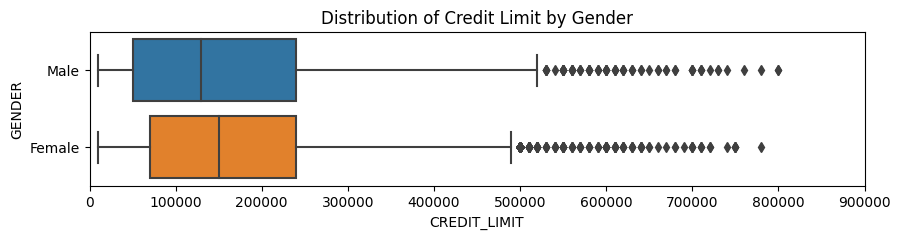

In [48]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data=df_main, y="GENDER", x="CREDIT_LIMIT")
ax.set_xlim(0,900000)
plt.title('Distribution of Credit Limit by Gender')
plt.show()

### Plot the distribution of CREDIT_LIMITS of each EDUCATION category

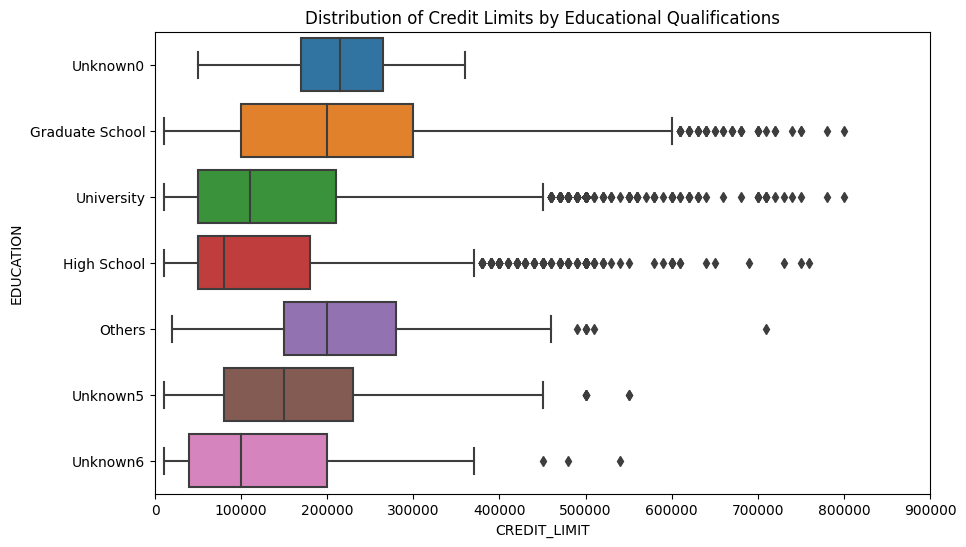

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_main, y="EDUCATION", x="CREDIT_LIMIT")
plt.title('Distribution of Credit Limits by Educational Qualifications')
ax.set_xlim(0,900000)
plt.show()

### Plot the distribution of CREDIT_LIMITS of each MARITAL_STATUS category

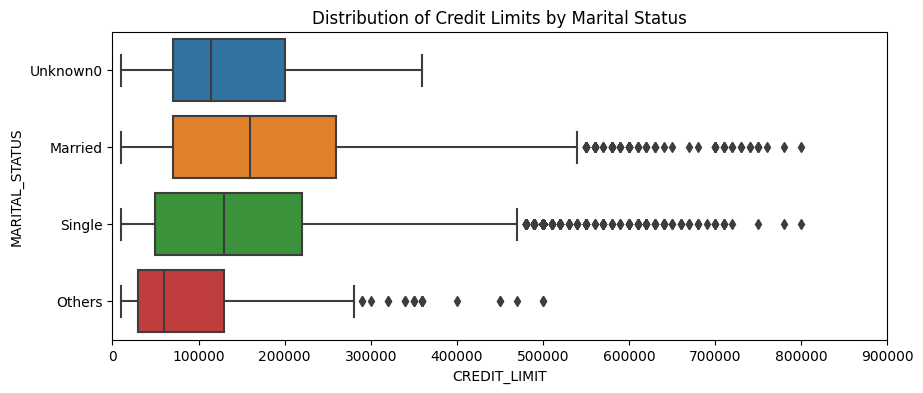

In [50]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df_main, y="MARITAL_STATUS", x="CREDIT_LIMIT")
plt.title('Distribution of Credit Limits by Marital Status')
ax.set_xlim(0,900000)
plt.show()

## Data Cleaning

In [53]:
# Check for missing values.
print(df_main.isnull().sum()) # No missing values

CREDIT_LIMIT         0
GENDER               0
EDUCATION            0
MARITAL_STATUS       0
AGE                  0
REPAY_STATUS_SEP     0
REPAY_STATUS_AUG     0
REPAY_STATUS_JUL     0
REPAY_STATUS_JUN     0
REPAY_STATUS_MAY     0
REPAY_STATUS_APR     0
BILL_STMT_AMT_SEP    0
BILL_STMT_AMT_AUG    0
BILL_STMT_AMT_JUL    0
BILL_STMT_AMT_JUN    0
BILL_STMT_AMT_MAY    0
BILL_STMT_AMT_APR    0
PAY_AMT_SEP          0
PAY_AMT_AUG          0
PAY_AMT_JUL          0
PAY_AMT_JUN          0
PAY_AMT_MAY          0
PAY_AMT_APR          0
IS_DEFAULT           0
dtype: int64


In [58]:
# check for duplicates
print(df_main.duplicated().sum())

35


In [57]:
duplicates = df_main[df_main.duplicated()]
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
       CREDIT_LIMIT  GENDER        EDUCATION MARITAL_STATUS  AGE  \
ID                                                                 
1981         150000  Female  Graduate School        Married   38   
4586         150000  Female  Graduate School        Married   31   
6023         210000  Female  Graduate School         Single   39   
6467         210000  Female       University        Married   49   
7320         500000    Male  Graduate School        Married   43   
8321         360000    Male       University        Married   41   
10251         50000    Male       University         Single   26   
13107        360000  Female  Graduate School        Married   49   
14295         20000    Male       University         Single   24   
15459        160000    Male       University         Single   28   
15618        200000  Female       University         Single   26   
15686        360000    Male  Graduate School         Single   29   
17033         50000  Female  Gra

# Data Analysis 

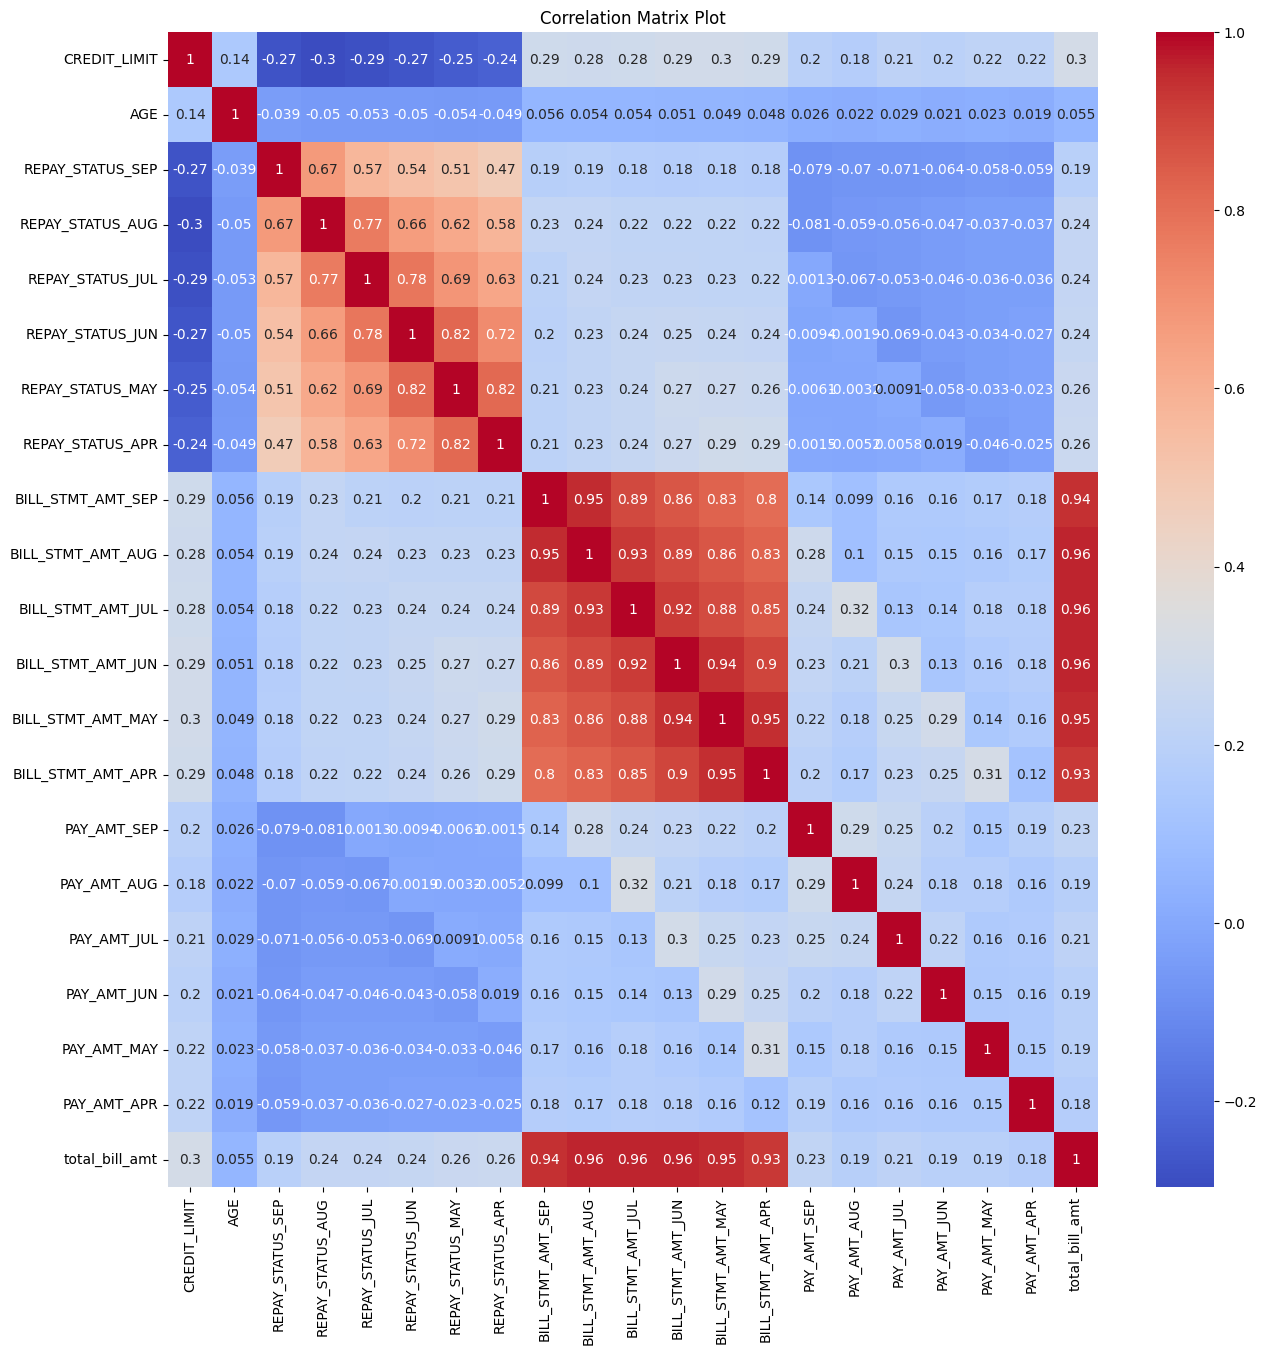

In [133]:
# Calculate the correlation matrix
corr_matrix = df_main.corr(numeric_only=True)

# Create a heatmap plot of the correlation matrix
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

# Set the plot title
ax.set_title("Correlation Matrix Plot")
plt.show()

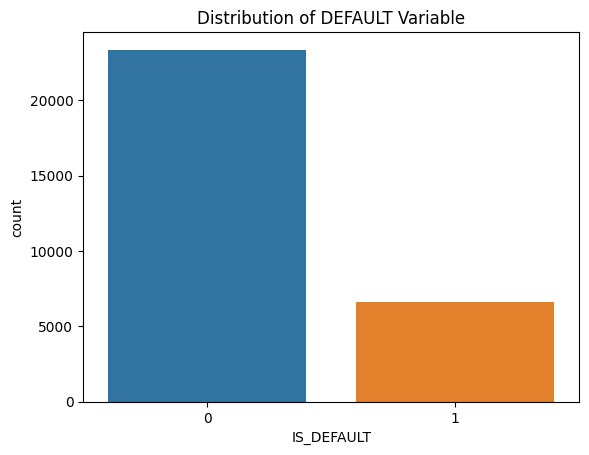

In [65]:
# Create a count plot of the DEFAULT variable
sns.countplot(x="IS_DEFAULT", data=df_main)

# Set the plot title
plt.title("Distribution of DEFAULT Variable")

plt.show()

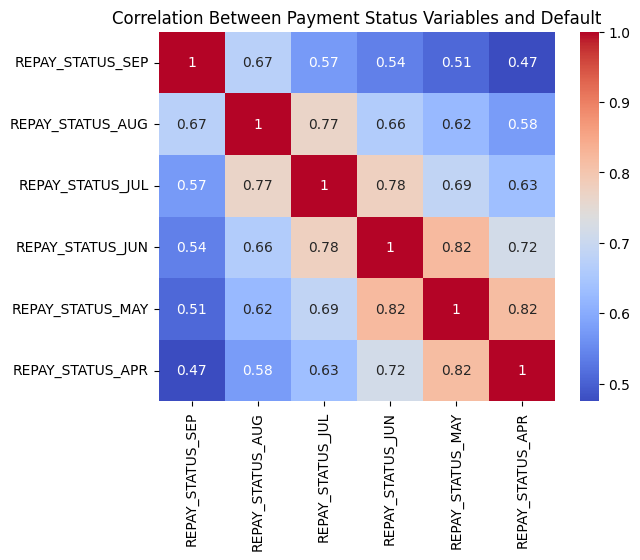

In [132]:
# Create a correlation matrix of the payment status variables and the target variable
corr_matrix = df_main[["REPAY_STATUS_SEP", "REPAY_STATUS_AUG", "REPAY_STATUS_JUL", "REPAY_STATUS_JUN", "REPAY_STATUS_MAY", "REPAY_STATUS_APR", "IS_DEFAULT"]].corr(numeric_only=True)

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

# Set the plot title
plt.title("Correlation Between Payment Status Variables and Default")

plt.show()

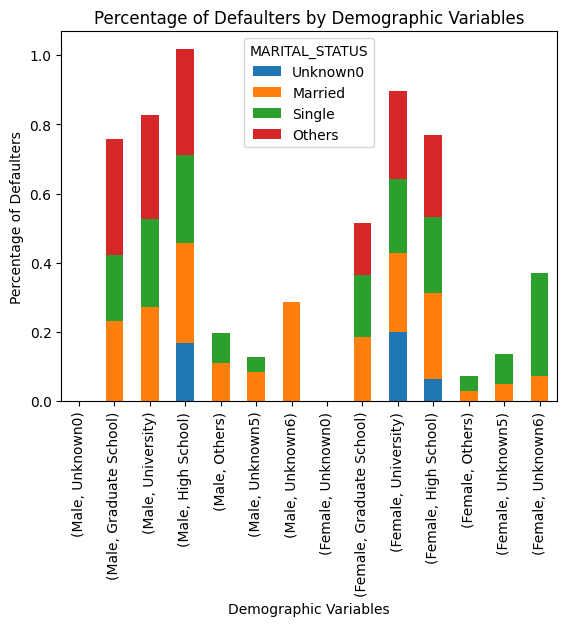

In [74]:
# Create a grouped dataframe of the demographic variables and the default variable
grouped_df = df_main.groupby(["GENDER", "EDUCATION", "MARITAL_STATUS", "IS_DEFAULT"]).size().unstack().fillna(0)
grouped_df["total"] = grouped_df.sum(axis=1)

# Calculate the percentage of defaulters for each group
grouped_df["default_pct"] = grouped_df[1] / grouped_df["total"]

# Create a stacked bar plot of the default percentage by demographic variables
grouped_df["default_pct"].unstack().plot(kind="bar", stacked=True)

# Set the plot title
plt.title("Percentage of Defaulters by Demographic Variables")

# Set the x-axis label
plt.xlabel("Demographic Variables")

# Set the y-axis label
plt.ylabel("Percentage of Defaulters")

plt.show()

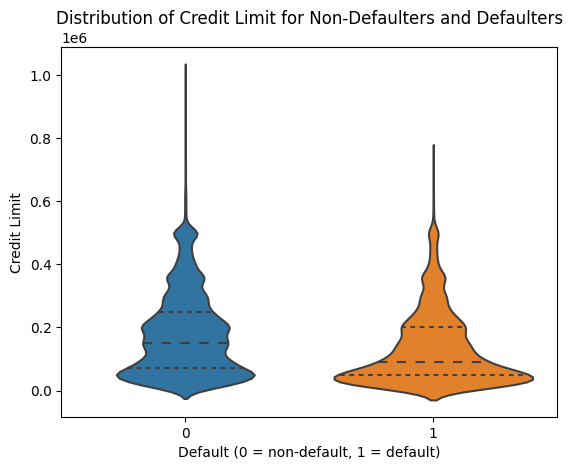

In [78]:
# Create a violin plot of the credit limit for non-defaulters and defaulters
sns.violinplot(data=df_main, x="IS_DEFAULT", y="CREDIT_LIMIT", inner="quartile")

# Set the plot title
plt.title("Distribution of Credit Limit for Non-Defaulters and Defaulters")

# Set the x-axis label
plt.xlabel("Default (0 = non-default, 1 = default)")

# Set the y-axis label
plt.ylabel("Credit Limit")

plt.show()

In [79]:
# Group by the DEFAULT column and calculate the mean of the BILL_AMT variables
grouped = df_main.groupby("IS_DEFAULT")[["BILL_STMT_AMT_SEP", "BILL_STMT_AMT_AUG", "BILL_STMT_AMT_JUL", "BILL_STMT_AMT_JUN", "BILL_STMT_AMT_MAY", "BILL_STMT_AMT_APR"]].mean()

# Display the results
print(grouped)

            BILL_STMT_AMT_SEP  BILL_STMT_AMT_AUG  BILL_STMT_AMT_JUL  \
IS_DEFAULT                                                            
0                51994.227273       49717.435670       47533.365605   
1                48509.162297       47283.617842       45181.598855   

            BILL_STMT_AMT_JUN  BILL_STMT_AMT_MAY  BILL_STMT_AMT_APR  
IS_DEFAULT                                                           
0                43611.165254       40530.445343       39042.268704  
1                42036.950573       39540.190476       38271.435503  


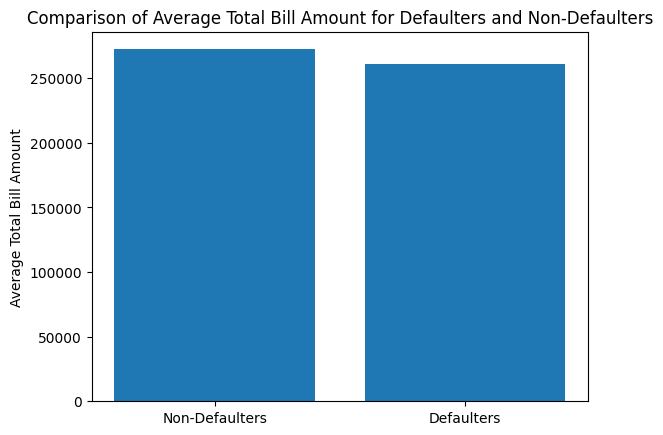

In [85]:
df_main['total_bill_amt'] = df_main[['BILL_STMT_AMT_SEP', 'BILL_STMT_AMT_AUG', 'BILL_STMT_AMT_JUL', 'BILL_STMT_AMT_JUN', 'BILL_STMT_AMT_MAY', 'BILL_STMT_AMT_APR']].sum(axis=1)
df_main.groupby('IS_DEFAULT')['total_bill_amt'].mean()

default_mean = df_main.groupby('IS_DEFAULT')['total_bill_amt'].mean()

plt.bar(default_mean.index, default_mean.values)
plt.xticks([0, 1], ['Non-Defaulters', 'Defaulters'])
plt.ylabel('Average Total Bill Amount')
plt.title('Comparison of Average Total Bill Amount for Defaulters and Non-Defaulters')
plt.show()

<Axes: xlabel='IS_DEFAULT', ylabel='CREDIT_LIMIT'>

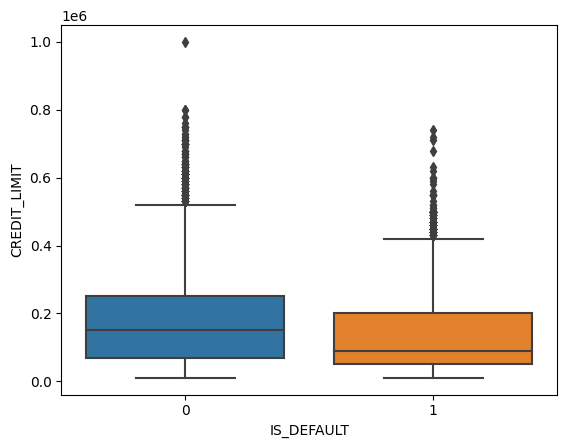

In [86]:
# Difference in the credit limits between defaulters and non-defaulters
sns.boxplot(x="IS_DEFAULT", y="CREDIT_LIMIT", data=df_main)

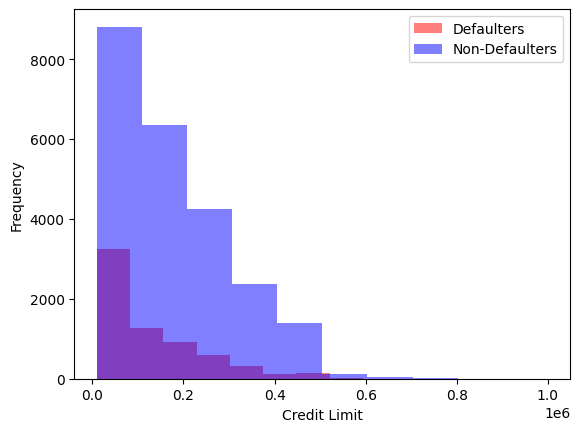

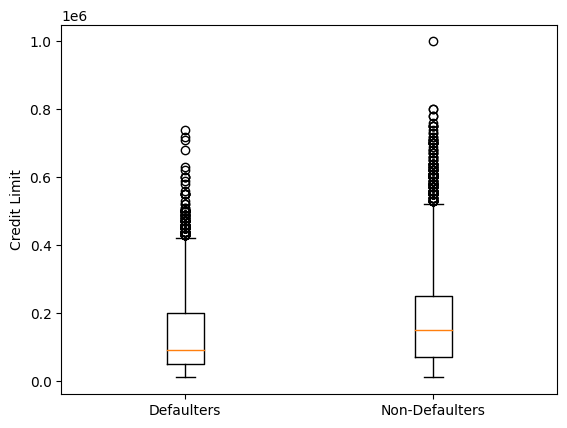

In [88]:
# Separate credit limit data for defaulters and non-defaulters
credit_limit_default = df_main[df_main['IS_DEFAULT']==1]['CREDIT_LIMIT']
credit_limit_nondefault = df_main[df_main['IS_DEFAULT']==0]['CREDIT_LIMIT']

# Create a histogram
plt.hist(credit_limit_default, alpha=0.5, label='Defaulters', color='red')
plt.hist(credit_limit_nondefault, alpha=0.5, label='Non-Defaulters', color='blue')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

# Create a box plot
plt.boxplot([credit_limit_default, credit_limit_nondefault], labels=['Defaulters', 'Non-Defaulters'])
plt.ylabel('Credit Limit')
plt.show()


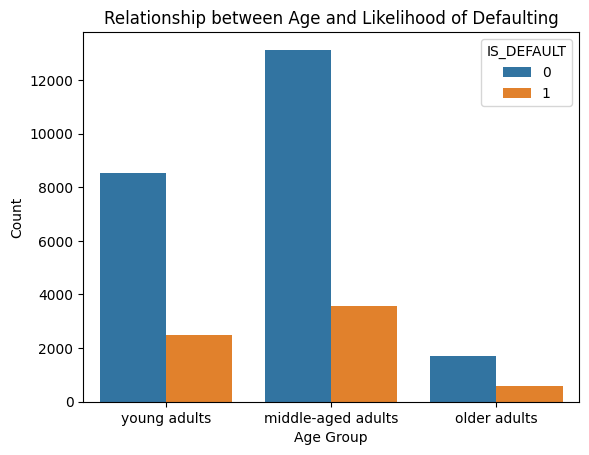

In [98]:
# Relationship between Age and Likelihood of Defaulting
# create age groups
bins = [0, 30, 50, df_main['AGE'].max()]
labels = ['young adults', 'middle-aged adults', 'older adults']
df_main['age_group'] = pd.cut(df_main['AGE'], bins=bins, labels=labels, include_lowest=True)

sns.countplot(x="age_group", hue="IS_DEFAULT", data=df_main)
plt.title("Relationship between Age and Likelihood of Defaulting")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show() 

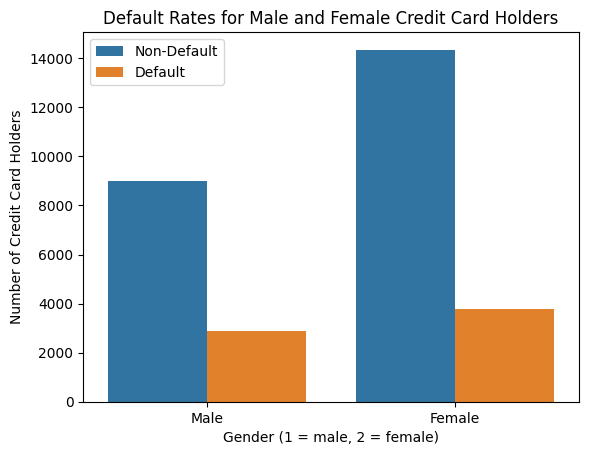

In [102]:
# Relationship between the Gender variable and the target variable (DEFAULT)
sns.countplot(x="GENDER", hue="IS_DEFAULT", data=df_main)
plt.title("Default Rates for Male and Female Credit Card Holders")
plt.xlabel("Gender (1 = male, 2 = female)")
plt.ylabel("Number of Credit Card Holders")
plt.legend(labels=["Non-Default", "Default"])
plt.show()


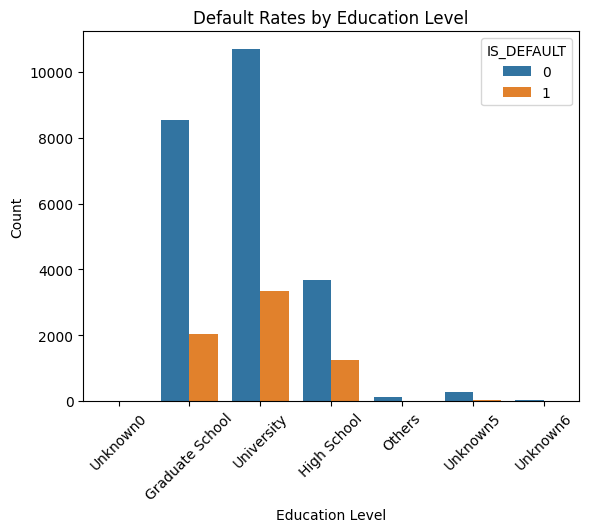

In [108]:
# Default Rates by Education Level
sns.countplot(x="EDUCATION", hue="IS_DEFAULT", data=df_main)
plt.title("Default Rates by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

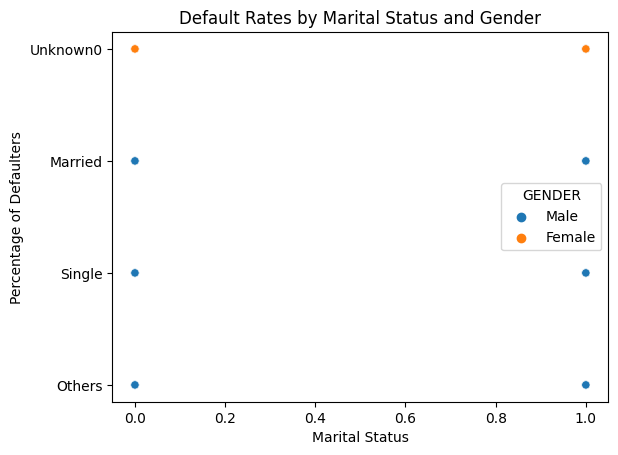

In [126]:
# bar plot comparing default rates by marital status
sns.scatterplot(y="MARITAL_STATUS", x="IS_DEFAULT", hue="GENDER", data=df_main)
plt.title("Default Rates by Marital Status and Gender")
plt.xlabel("Marital Status")
plt.ylabel("Percentage of Defaulters")
plt.show()

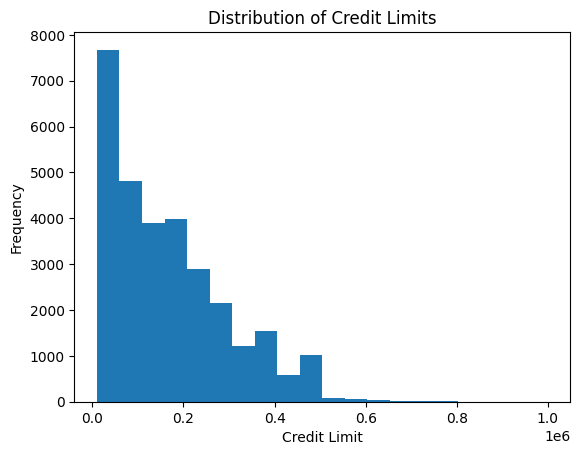

In [128]:
# distribution of the credit limits across the dataset
plt.hist(df_main['CREDIT_LIMIT'], bins=20)
plt.title("Distribution of Credit Limits")
plt.xlabel("Credit Limit")
plt.ylabel("Frequency")
plt.show()

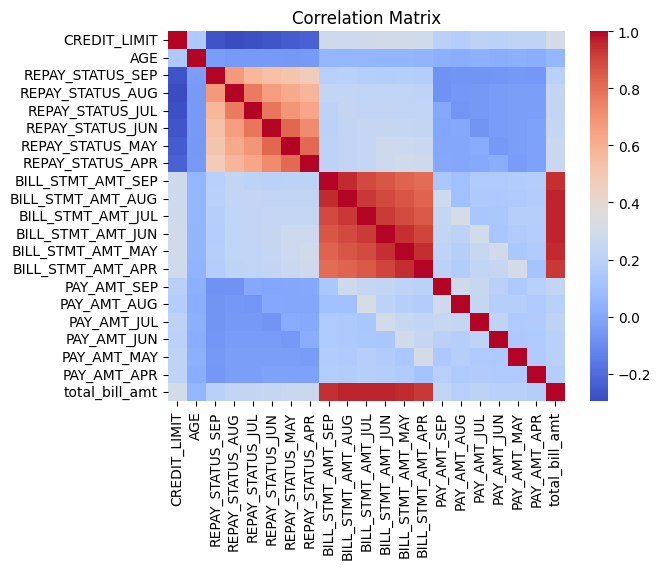

In [131]:
# Identifying patterns.
corr = df_main.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()